# Simulation

On va essayer de faire des simulations à partir de l'article **Epidemiological modelling of the 2005 French riots : a spreading wave and the role of contagion**  qui est trouvable sur [www.nature.com/scientificreports]

On va s'intéresser à l'étude de la propagation de manifestation dans la France métropolitaine à l'échelle des départements

In [2]:
import pandas as pd
import copy
import matplotlib.pyplot as plt

### Bases de données

On va premièrement chercher à avoir une base de données recensant pour chaque département de France métropolitaine; le nombre de personnes sensibles (personnes actives agées de 15 à 24 ans sans emploi), et les coordonnées des départements.

**Rq** : Dans l'aticle les personnes caractérisées de sensible sont les hommes de 16 à 24 ans sans emploi et sans qualification

In [3]:
df1 = pd.read_excel('department and pop by five years.xlsx')

In [4]:
df1.loc[51]

Unnamed: 0           Marne
0 à 4 ans            30191
5 à 9 ans            34561
10 à 14 ans          34457
15 à 19 ans          37486
                     ...  
80 à 84 ans.2         9205
85 à 89 ans.2         7107
90 à 94 ans.2         3755
95 ans et plus.2      1462
Total.2             291158
Name: 51, Length: 64, dtype: object

Dans la base de données, les données étaient rangangées de telle sorte que la pop totale soit en première, ensuite les hommes et après les femmes. Les données viennent de l'INSEE à l'adresse [https://www.insee.fr/fr/statistiques/1893198] dans le fichier : **Estimation de population par département, sexe et âge quinquennal - Années 1975 à 2020**. On a pris que l'estimation de la population en 2020.

In [5]:
df2 = pd.read_excel("department and unemployment rate.xlsx")

In [6]:
df2.loc[51]

Unnamed: 0           51
Unnamed: 1        Marne
Ensemble            7.8
Hommes              8.1
Femmes              7.6
15-24 ans          18.6
25-49 ans           7.4
50 ans ou plus      5.3
Name: 51, dtype: object

On a récupé ces données de l'INSEE sur [https://www.insee.fr/fr/statistiques/2134411#tableau-TCRD_087_tab1_departements]

Avec ces bases de données on veut récupérer pour chaque département le nombre de chomeur de 15 à 24 ans 

In [7]:
df1 = df1.rename(columns={'Unnamed: 0' : 'departments'})
df2 = df2.rename(columns={'Unnamed: 1' : 'departments'})
df2 = df2.rename(columns={'Unnamed: 0' : 'numero_departement'})

In [8]:
df = pd.merge(df1,df2,on = 'departments')
df['pop sensible'] = (df['15 à 19 ans'] + df['20 à 24 ans']) * df['15-24 ans']
df_v1 = df[['departments','pop sensible','numero_departement']]
df_v1 = df_v1[df_v1['numero_departement'] != '2A'][df_v1['numero_departement'] != '2B']
df_v1['numero_departement'] = df_v1['numero_departement'].astype(int)

C:\Users\mathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [9]:
df_v1

,departments,pop sensible,numero_departement
0,Ain,1067024.8,1
1,Aisne,1683900.3,2
2,Allier,680186.5,3
3,Alpes-de-Haute-Provence,351066.5,4
4,Hautes-Alpes,234743.6,5
...,...,...,...
91,Essonne,2543595.0,91
92,Hauts-de-Seine,1982670.4,92
93,Seine-Saint-Denis,4071249.0,93
94,Val-de-Marne,2540298.3,94


Ces données ont été récupérées sur [https://www.data.gouv.fr/fr/datasets/listes-des-communes-geolocalisees-par-regions-departements-circonscriptions-nd]

In [10]:
df3 = pd.read_csv('regions_departements_circonscriptions_communes_gps.csv', delimiter=';')
df3

,EU_circo,code_region,nom_region,chef-lieu_region,numero_departement,nom_departement,prefecture,numero_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,eloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Attignat,1340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Beaupont,1270,1029,46.4,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Bény,1370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Béreyziat,1340,1040,46.366667,5.05,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,1250,1245,46.133333,5.4,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36835,Outre-Mer,5,Mayotte,Mamoudzou,976,Mayotte,Mamoudzou,1,M'TSANGAMOUJI,97600,97613,NaN,NaN,NaN
36836,Outre-Mer,5,Mayotte,Mamoudzou,976,Mayotte,Mamoudzou,1,OUANGANI,97600,97614,NaN,NaN,NaN
36837,Outre-Mer,5,Mayotte,Mamoudzou,976,Mayotte,Mamoudzou,1,PAMANDZI,97610,97615,NaN,NaN,NaN
36838,Outre-Mer,5,Mayotte,Mamoudzou,976,Mayotte,Mamoudzou,1,SADA,97640,97616,NaN,NaN,NaN


In [11]:
df3 = df3.dropna(subset=['latitude', 'longitude'])
df3 = df3.replace(regex=r',', value='.')
df3

,EU_circo,code_region,nom_region,chef-lieu_region,numero_departement,nom_departement,prefecture,numero_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,eloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Attignat,1340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Beaupont,1270,1029,46.4,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Bény,1370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Béreyziat,1340,1040,46.366667,5.05,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,1250,1245,46.133333,5.4,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36703,Île-de-France,11,Île-de-France,Paris,95,Val-d'Oise,Cergy,9,Survilliers,95470,95604,49.1,2.55,1.92
36704,Île-de-France,11,Île-de-France,Paris,95,Val-d'Oise,Cergy,9,Vaudherland,95500,95633,49,2.483333,1.6
36705,Île-de-France,11,Île-de-France,Paris,95,Val-d'Oise,Cergy,9,Vémars,95470,95641,49.066667,2.566667,2
36706,Île-de-France,11,Île-de-France,Paris,95,Val-d'Oise,Cergy,9,Villeron,95380,95675,49.05,2.533333,1.84


In [12]:
m_neg = df3["longitude"].str[-1].isin(['-'])
# remove - signs
df3 = df3.replace(regex=r'-', value="0")
# convert to number
df3[['longitude']] = df3[['longitude']].astype(float)
# Apply the mask to create the negatives
df3.loc[m_neg, "longitude"] *= -1 

In [13]:
df3['latitude'] = df3['latitude'].astype(float)
df3 = df3[ df3.numero_departement != '2A'][ df3.numero_departement != '2B']

df3['numero_departement'] = df3['numero_departement'].astype(float)

C:\Users\mathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [14]:
df4 = df3.groupby('nom_departement').mean()


In [15]:
df4['departments'] = df4.index
df4

,code_region,numero_departement,numero_circonscription,code_insee,latitude,longitude,departments
nom_departement,,,,,,,
Ain,82.0,1.0,2.688776,1226.316327,46.084507,5.338151,Ain
Aisne,22.0,2.0,3.087467,2420.364230,49.548357,3.529341,Aisne
Allier,83.0,3.0,2.563758,3161.265101,46.355509,3.174804,Allier
Alpes0Maritimes,93.0,6.0,5.688312,6081.422078,43.841937,7.112608,Alpes0Maritimes
Alpes0de0Haute0Provence,93.0,4.0,1.494444,4121.900000,44.073037,6.124074,Alpes0de0Haute0Provence
...,...,...,...,...,...,...,...
Vendée,52.0,85.0,3.338462,85152.584615,46.662039,1.239423,Vendée
Vienne,54.0,86.0,2.801527,86149.526718,46.606903,0.408352,Vienne
Vosges,41.0,88.0,3.002062,88264.325773,48.232200,6.310389,Vosges


In [16]:
df4 = df4[['departments','latitude','longitude','numero_departement']]
df4 = df4.sort_values(by=['numero_departement'])
df4['numero_departement'] = df4['numero_departement'].astype(int)
df4


,departments,latitude,longitude,numero_departement
nom_departement,,,,
Ain,Ain,46.084507,5.338151,1
Aisne,Aisne,49.548357,3.529341,2
Allier,Allier,46.355509,3.174804,3
Alpes0de0Haute0Provence,Alpes0de0Haute0Provence,44.073037,6.124074,4
Hautes0Alpes,Hautes0Alpes,44.574936,6.109509,5
...,...,...,...,...
Essonne,Essonne,48.554645,2.256056,91
Hauts0de0Seine,Hauts0de0Seine,48.840991,2.255180,92
Seine0Saint0Denis,Seine0Saint0Denis,48.909375,2.457917,93


In [17]:
df_v2=pd.merge(df4,df_v1,on='numero_departement')
df_v2

,departments_x,latitude,longitude,numero_departement,departments_y,pop sensible
0,Ain,46.084507,5.338151,1,Ain,1067024.8
1,Aisne,49.548357,3.529341,2,Aisne,1683900.3
2,Allier,46.355509,3.174804,3,Allier,680186.5
3,Alpes0de0Haute0Provence,44.073037,6.124074,4,Alpes-de-Haute-Provence,351066.5
4,Hautes0Alpes,44.574936,6.109509,5,Hautes-Alpes,234743.6
...,...,...,...,...,...,...
88,Essonne,48.554645,2.256056,91,Essonne,2543595.0
89,Hauts0de0Seine,48.840991,2.255180,92,Hauts-de-Seine,1982670.4
90,Seine0Saint0Denis,48.909375,2.457917,93,Seine-Saint-Denis,4071249.0
91,Val0de0Marne,48.783974,2.454327,94,Val-de-Marne,2540298.3


On a finalement réussi à avoir une base de données avec tout ce qui nous intéresse

### Algorithme  

On va tout d'abord mettre chaque département dans un graph et calculer la distance entre chaque département que l'on va insérer dans ce même graphe

In [18]:
graph = {}
for i, j in enumerate(df_v2.numero_departement) :
    graph[j] = [[ df_v2.iloc[i]['pop sensible'], df_v2.iloc[i]['latitude'], df_v2.iloc[i]['longitude']],{},[[0,df_v2.iloc[i]['pop sensible']]]]

In [19]:
def distance (graph, i, j):
    return (abs(graph[i][0][1] - graph[j][0][1]) ** 2 + abs(graph[i][0][2] - graph[i][0][2])** 2) ** (1 / 2)

In [20]:
for i in graph.keys():
    for j in graph.keys(): 
        graph[i][1][j] = distance(graph,i ,j)

On va ensuite s'appuyer sur le modèle théorique de l'article, qui nous donnes les deux équations couplées :

$$\frac{d\lambda_k(t)}{dt}=-w_k\lambda_k(t) + \sigma_k(t)\beta\left( \sum\limits_{j=0}^{n}\frac{W_{k,j}\lambda_j(t)}{N_j} \right)$$
$$\frac{d\sigma_k(t)}{dt}=-\sigma_k(t)\beta\left( \sum\limits_{j=0}^{n}\frac{W_{k,j}\lambda_j(t)}{N_j} \right)
$$

Avec, $S_k$ qui est ici représenté par la population sensible et $I_k$ les personnes qui sont actives dans les manifestations.
On a donc,
$$\alpha I_k = \lambda_k$$
$$\alpha S_k = \sigma_k$$

Avec, $\lambda_k$ qui représent le nombre d'incidents et $\sigma_k$ le nombre d'incidents potentiels.

Et on choisit finalement les pondérations,
$$W{k,j}=\left(1+\frac{dist(k,j)}{d_o}\right)^{-\delta}$$

In [21]:
def phi(graph, i, t, alpha, do, delta):
    beta = 0.1
    # calcul of the influence
    influence = 0
    for j in graph.keys():

        W_i_j = (1 + graph[i][1][j] / do) ** (-delta)
        lambda_j = graph[j][2][t][0]
        N_j = graph[j][0][0] * alpha
        #print(N_j)
        #print(W_i_j, lambda_j, N_j)
        influence +=  W_i_j * lambda_j / N_j
        
    #print(influence)    
    return beta * influence
        

In [22]:
def iteration(graph, local_recovery_rate, days, epsilon, phi, alpha, do, delta):
    for i in graph.keys():
        graph[i][2][0][0] = alpha * graph[i][2][0][0]
        graph[i][2][0][1] = alpha * graph[i][2][0][1] 
    for t in range(days):
        for i in graph.keys():
            lambda_t = graph[i][2][t][0]
            sigma_t = graph[i][2][t][1]
            #print(lambda_t, sigma_t)
            lambda_t_plus_1 = (- local_recovery_rate * lambda_t + sigma_t * phi(graph, i, t, alpha, do, delta)) * epsilon + lambda_t
            sigma_t_plus_1 = (- sigma_t * phi(graph, i, t, alpha, do, delta)) * epsilon + sigma_t
            #print ('A',lambda_t_plus_1,'B', sigma_t_plus_1)
            graph[i][2].append([lambda_t_plus_1, sigma_t_plus_1])
            

### Exploitation des résultats

Sachant qu'on a pas les données quantitatives de ces manifestations, on a choisi de prendre des paramètres arbitraires.

On fait tout d'abord une simulation dans la quelle il y a un choc au niveau de la population dans le 93 (10 % des habitants potentiellements attirés par une manifestation de ce type ce mettent à manifester).

In [23]:
graph_copy = copy.deepcopy(graph)
graph_copy[93][2][0][0] = graph_copy[93][2][0][1] * 0.1
graph_copy[93][2][0][1] = graph_copy[93][2][0][1] * 0.9
iteration(graph_copy, 0.1, 1000, 0.1, phi, 0.00001, 2, 3)

In [37]:
X = [ i* 0.1  for i in range(len(graph_copy[93][2]))]
Y1 = [graph_copy[93][2][i][0] for i in range(len(graph_copy[93][2]))]
Y2 = [graph_copy[92][2][i][0] for i in range(len(graph_copy[92][2]))]
Y3 = [graph_copy[94][2][i][0] for i in range(len(graph_copy[94][2]))]
Y4 = [graph_copy[95][2][i][0] for i in range(len(graph_copy[95][2]))]
Y5 = [graph_copy[91][2][i][0] for i in range(len(graph_copy[91][2]))]
Y6 = [graph_copy[77][2][i][0] for i in range(len(graph_copy[77][2]))]
Y7 = [graph_copy[78][2][i][0] for i in range(len(graph_copy[78][2]))]

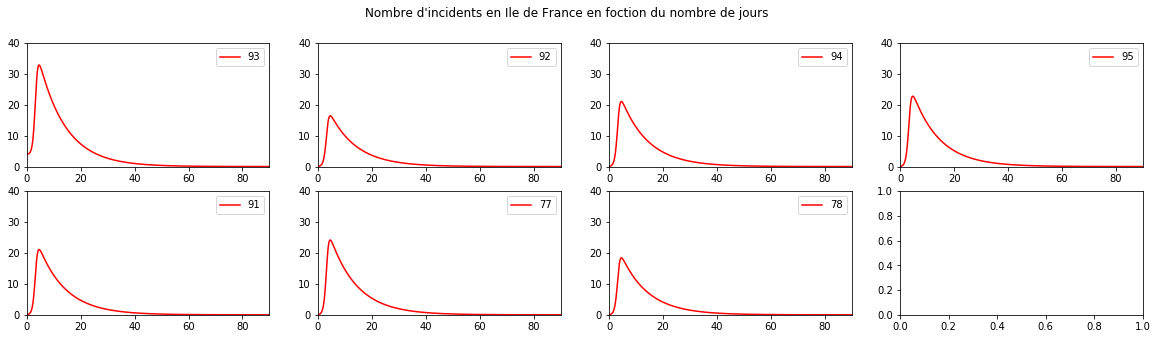

In [38]:
Y = [[Y1,'93'], [Y2,'92'], [Y3,'94'], [Y4,'95'], [Y5,'91'], [Y6,'77'], [Y7,'78']]
fig, ax = plt.subplots(2, 4, figsize=(20, 5)) 
j, i = 0, 0
for liste in Y :
    if i >= 4 * (j + 1):
        j += 1
        i = 0
    ax[j][i].plot(X, liste[0], color='red', label=liste[1])
    ax[j][i].legend()
    ax[j][i].set_ylim([0,40])
    ax[j][i].set_xlim([0,90])
    i += 1
    
fig.suptitle("Nombre d'incidents en Ile de France en foction du nombre de jours") 
plt.show()

On peut aussi voir comment les manifestations peuvent se propager dans la france (on a choisi de regarder la propagation vers le sud).

In [28]:
X = [ i* 0.1  for i in range(len(graph_copy[93][2]))]
Y1 = [graph_copy[93][2][i][0] for i in range(len(graph_copy[93][2]))]
Y2 = [graph_copy[77][2][i][0] for i in range(len(graph_copy[92][2]))]
Y3 = [graph_copy[45][2][i][0] for i in range(len(graph_copy[94][2]))]
Y4 = [graph_copy[18][2][i][0] for i in range(len(graph_copy[95][2]))]
Y5 = [graph_copy[23][2][i][0] for i in range(len(graph_copy[91][2]))]
Y6 = [graph_copy[46][2][i][0] for i in range(len(graph_copy[77][2]))]
Y7 = [graph_copy[81][2][i][0] for i in range(len(graph_copy[78][2]))]
Y8 = [graph_copy[11][2][i][0] for i in range(len(graph_copy[78][2]))]

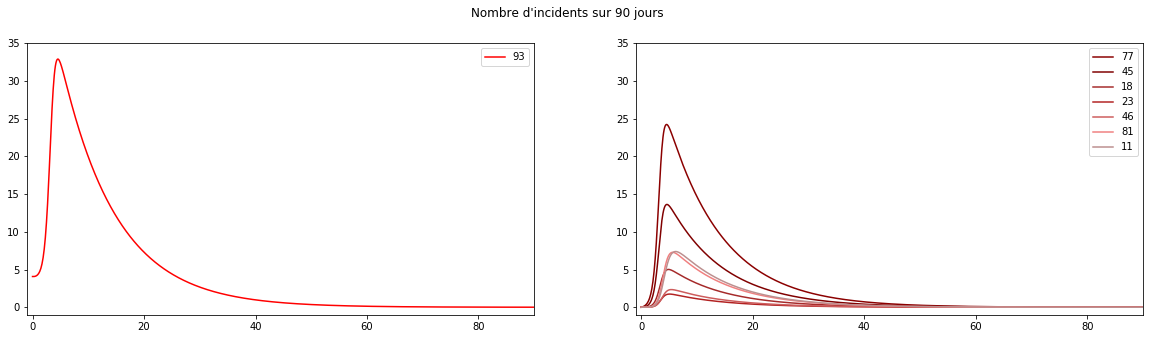

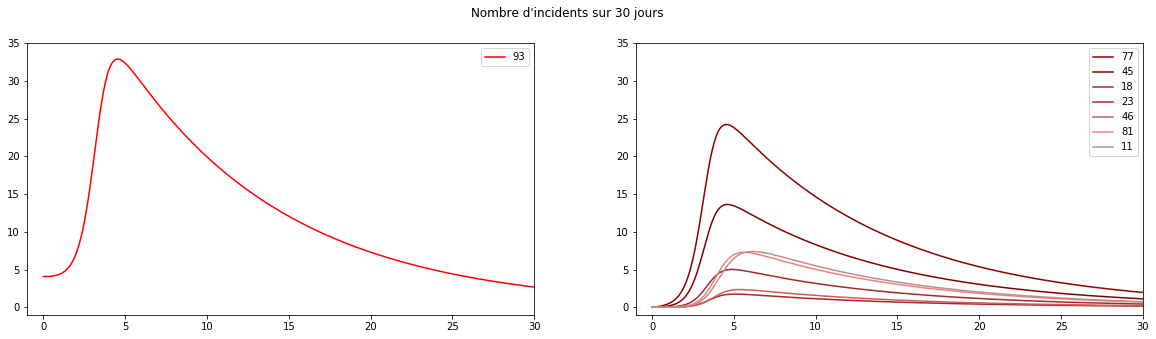

In [33]:
Y = [[Y1,'93','red'], [Y2,'77','darkred'], [Y3,'45','maroon'], [Y4,'18','brown'], [Y5,'23','firebrick'], [Y6,'46','indianred'], [Y7,'81', 'lightcoral'], [Y8,'11','rosybrown']]
fig, ax = plt.subplots(1, 2, figsize=(20, 5)) 
i = 0
for liste in Y :
    ax[i].set_ylim([-1,35])
    ax[i].set_xlim([-1,90])
    ax[i].plot(X, liste[0], color=liste[2], label=liste[1])
    ax[i].legend()
    if i == 0:
        i = 1
    
fig.suptitle("Nombre d'incidents sur 90 jours") 
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20, 5)) 
i = 0
for liste in Y :
    ax[i].set_ylim([-1,35])
    ax[i].set_xlim([-1,30])
    ax[i].plot(X, liste[0], color=liste[2], label=liste[1])
    ax[i].legend()
    if i == 0:
        i = 1
    
fig.suptitle("Nombre d'incidents sur 30 jours") 
plt.show()

On remarque bien que à mesure ou les départements s'éloignent du 93 le nombre d'incidents diminue et le pic d'incidents est retadé.